In [44]:
import pandas as pd

In [45]:
df = pd.read_csv ("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [46]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [48]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [49]:
df.shape

(133349, 11)

In [50]:
linhas, colunas = df.shape[0], df.shape[1]
print('linhas:', linhas)
print('colunas:', colunas)

linhas: 133349
colunas: 11


In [51]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [80]:
df.columns = [
    'ano',
    'senioridade',
    'contrato',
    'cargo',
    'salario',
    'moeda',
    'usd',
    'residencia',
    'remoto',
    'empresa',
    'tamanho_empresa'
]
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [53]:
df["senioridade"]. value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [54]:
df["contrato"]. value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [55]:
df["remoto"]. value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [98]:
mapeamento_senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['senioridade'] = df['senioridade'].replace(mapeamento_senioridade)

print('Novas categorias da coluna senioridade:')
display(df['senioridade'].value_counts())

Novas categorias da coluna senioridade:


,count
senioridade,
Sênior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [82]:
mapeamento_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance'
}
df['contrato'] = df['contrato'].replace(mapeamento_contrato)

print('Novas categorias da coluna contrato:')
display(df['contrato'].value_counts())

Novas categorias da coluna contrato:


,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelance,16


In [58]:
print('Categorias originais da coluna tamanho_empresa:')
display(df['tamanho_empresa'].value_counts())

mapeamento_tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(mapeamento_tamanho_empresa)

print('Novas categorias da coluna tamanho_empresa:')
display(df['tamanho_empresa'].value_counts())

Categorias originais da coluna tamanho_empresa:


,count
tamanho_empresa,
M,129561
L,3574
S,214


Novas categorias da coluna tamanho_empresa:


,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [83]:
print('Categorias originais da coluna remoto:')
display(df['remoto'].value_counts())

mapeamento_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}
df['remoto'] = df['remoto'].replace(mapeamento_remoto)

print('Novas categorias da coluna remoto:')
display(df['remoto'].value_counts())

Categorias originais da coluna remoto:


,count
remoto,
0,105312
100,27718
50,319


Novas categorias da coluna remoto:


,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [60]:
df.head(10)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
5,2025.0,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,Média
6,2025.0,Sênior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Média
7,2025.0,Sênior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Média
8,2025.0,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Média
9,2025.0,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Média


In [61]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [62]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [84]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [85]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [86]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [87]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,M
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,M
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,M
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,M
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,M
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,M
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,M
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,L
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,L
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,L


In [69]:
#Importando a biblioteca "Numpy" biblioteca utilizada para calculos de numero em python
import numpy as np

#Criaçao de um dataframe teste
df_salarios = pd.DataFrame({
    'nome': ["Ana","Samuel","Jose","Nara","Sueli"],
    'salario': [4000, np.nan, 5000, np.nan, 50000]
})

#calcula a media salarial e substitui os nulos pela media, arredondando os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#Calcula a mediana e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Samuel,NaN,19666.67,5000.0
2,Jose,5000.0,5000.00,5000.0
3,Nara,NaN,19666.67,5000.0
4,Sueli,50000.0,50000.00,50000.0


In [88]:
df_temperaturas = pd.DataFrame({
    'Dia': ["Segunda","Terça","Quarta","Quinta","Sexta"],
    'Temperatura': [30, np.nan, np.nan, 20, 25]
})

# Utilizando o comando ffill, ele traz o para o dado nulo o valor anterior.. no caso ele pega o valor da segunda (dia anterior) e preenche no dado nulo.
df_temperaturas["preenchido"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas


,Dia,Temperatura,preenchido
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,20.0,20.0
4,Sexta,25.0,25.0


In [71]:
df_temperaturas = pd.DataFrame({
    'Dia': ["Segunda","Terça","Quarta","Quinta","Sexta"],
    'Temperatura': [30, np.nan, np.nan, 20, 25]
})

#Utilizando o comando bfill ele traz o dado do dis posterior, no caso ele pega o dado(valor) da quinta(o proximo dia) e traz para os dados nulos
df_temperaturas["preenchido"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido
0,Segunda,30.0,30.0
1,Terça,NaN,20.0
2,Quarta,NaN,20.0
3,Quinta,20.0,20.0
4,Sexta,25.0,25.0


In [72]:
df_cidades = pd.DataFrame({
    'nome': ["Ana","Samuel","Jose","Nara","Sueli"],
    'cidade': ["Ribeirão Pires", np.nan, "Suzano", np.nan, "Belo Horizonte"]
})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades


,nome,cidade,cidade_preenchida
0,Ana,Ribeirão Pires,Ribeirão Pires
1,Samuel,NaN,Não informado
2,Jose,Suzano,Suzano
3,Nara,NaN,Não informado
4,Sueli,Belo Horizonte,Belo Horizonte


In [90]:
df_limpo = df.dropna()

In [91]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [92]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [93]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [96]:
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))
#Conversao de tipo de dados.. para remocao do dado da casa decimal adicional.

In [99]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


<Axes: title={'center': 'Distribuiçao de Senioridade'}, xlabel='senioridade'>

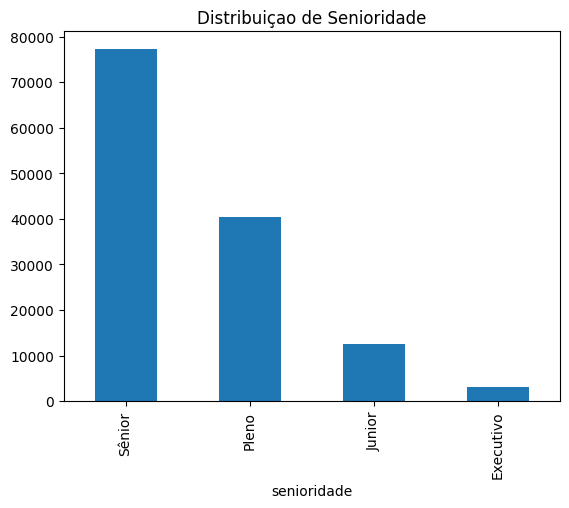

In [101]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuiçao de Senioridade")
#Criaçao de graficos utilizando o pandas, este codigo executado cria uma grafico de barras.


In [102]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

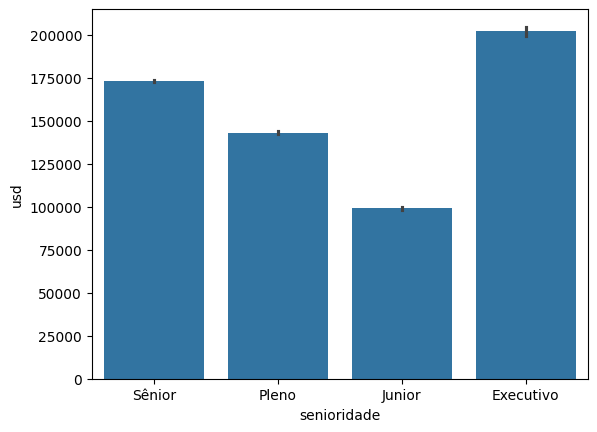

In [104]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [105]:
import matplotlib.pyplot as plt

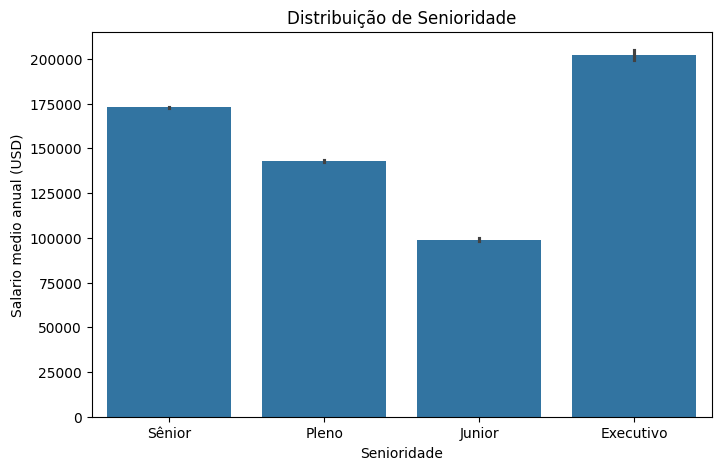

In [106]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Distribuição de Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario medio anual (USD)')
plt.show()

In [107]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [114]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

In [109]:
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

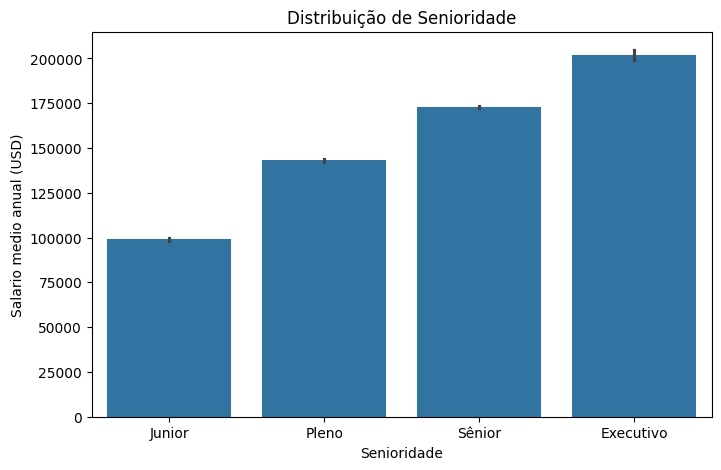

In [115]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Distribuição de Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario medio anual (USD)')
plt.show()

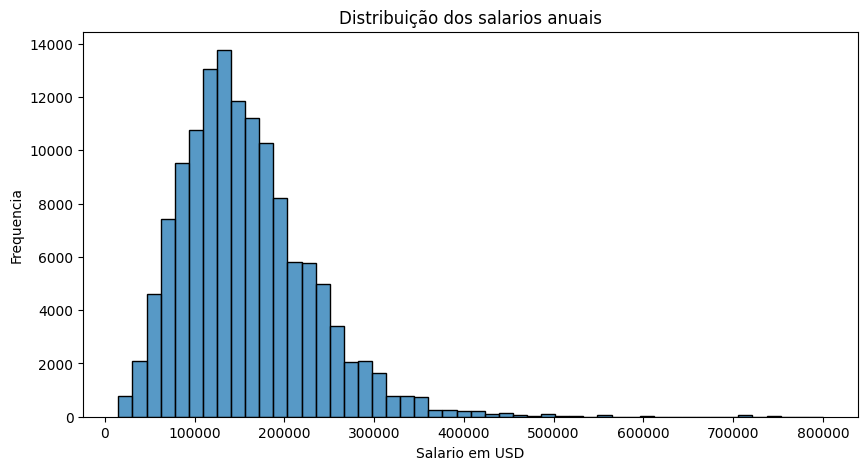

In [123]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo['usd'], bins = 50, kde=False)
plt.title('Distribuição dos salarios anuais')
plt.xlabel('Salario em USD')
plt.ylabel('Frequencia')
plt.show()

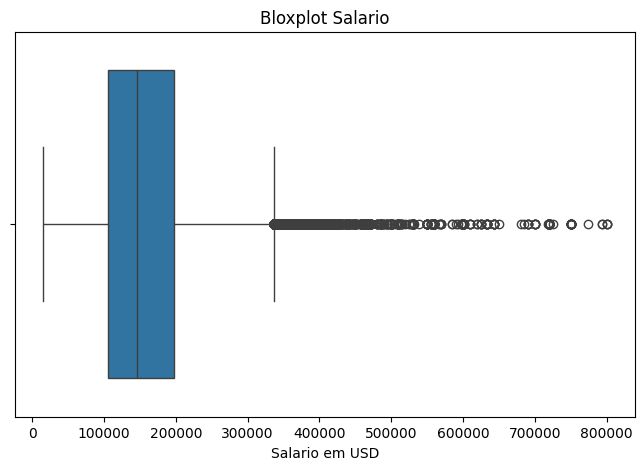

In [127]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Bloxplot Salario')
plt.xlabel('Salario em USD')
plt.show()

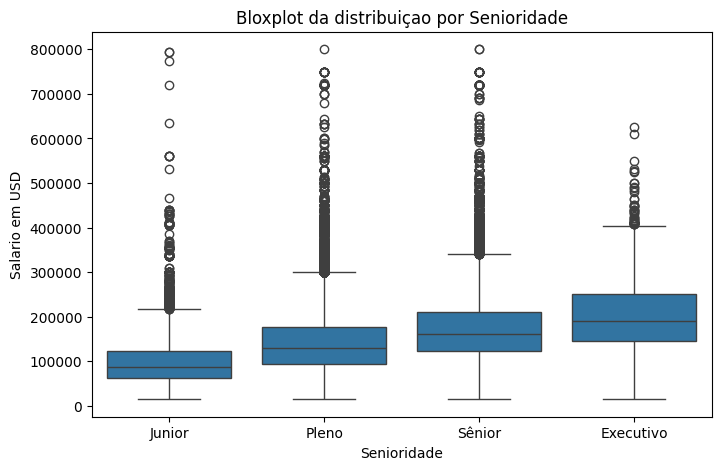

In [129]:
ordem_senioridade = ['Junior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Bloxplot da distribuiçao por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario em USD')
plt.show()

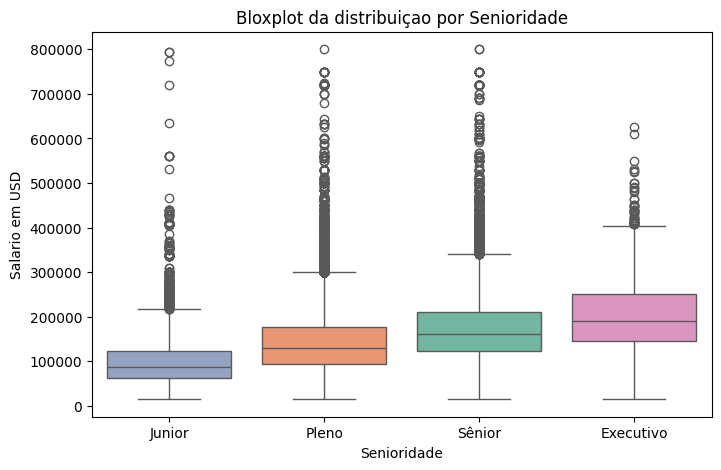

In [130]:
ordem_senioridade = ['Junior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Bloxplot da distribuiçao por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario em USD')
plt.show()

In [131]:
import plotly.express as px

In [132]:
df_media_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reindex(ordem_senioridade).reset_index()

fig = px.bar(
    df_media_senioridade,
    x='senioridade',
    y='usd',
    title='Média Salarial por Senioridade (USD)',
    labels={
        'senioridade': 'Senioridade',
        'usd': 'Média Salarial Anual (USD)'
    },
    color='senioridade', # Optional: to color bars by seniority
    color_discrete_sequence=px.colors.qualitative.Set2 # Optional: consistent color palette
)

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':ordem_senioridade})
fig.show()

In [137]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Distribuição de Tipo de Trabalho Remoto',
             hole=0.6)

fig.update_traces(textinfo='percent+label')
fig.show()